In [48]:
import pandas as pd
import sklearn  as sk
import numpy as np
from matplotlib import pyplot as pp


In [50]:
APPLE = pd.read_csv('Data/AAPL.csv')
ADOBE = pd.read_csv('Data/ADBE.csv')
GOOGLE = pd.read_csv('Data/GOOGL.csv')
MICROSOFT = pd.read_csv('Data/MSFT.csv')
NVIDIA = pd.read_csv('Data/NVDA.csv')
SONY = pd.read_csv('Data/SNE.csv')
Globals = ["APPLE", "ADOBE", "GOOGLE", "MICROSOFT", "NVIDIA", "SONY"]


In [51]:
APPLE11 = pd.read_csv('Data/2011/AAPL.csv')
ADOBE11 = pd.read_csv('Data/2011/ADBE.csv')
GOOGLE11 = pd.read_csv('Data/2011/GOOGL.csv')
MICROSOFT11 = pd.read_csv('Data/2011/MSFT.csv')
NVIDIA11 = pd.read_csv('Data/2011/NVDA.csv')
SONY11 = pd.read_csv('Data/2011/SNE.csv')
dat11 = ["APPLE11", "ADOBE11", "GOOGLE11", "MICROSOFT11", "NVIDIA11", "SONY11"]

APPLE12 = pd.read_csv('Data/2012/AAPL.csv')
ADOBE12 = pd.read_csv('Data/2012/ADBE.csv')
GOOGLE12 = pd.read_csv('Data/2012/GOOGL.csv')
MICROSOFT12 = pd.read_csv('Data/2012/MSFT.csv')
NVIDIA12 = pd.read_csv('Data/2012/NVDA.csv')
SONY12 = pd.read_csv('Data/2012/SNE.csv')
dat12 = ["APPLE12", "ADOBE12", "GOOGLE12", "MICROSOFT12", "NVIDIA12", "SONY12"]

APPLE13 = pd.read_csv('Data/2013/AAPL.csv')
ADOBE13 = pd.read_csv('Data/2013/ADBE.csv')
GOOGLE13 = pd.read_csv('Data/2013/GOOGL.csv')
MICROSOFT13 = pd.read_csv('Data/2013/MSFT.csv')
NVIDIA13 = pd.read_csv('Data/2013/NVDA.csv')
SONY13 = pd.read_csv('Data/2013/SNE.csv')
dat13 = ["APPLE13", "ADOBE13", "GOOGLE13", "MICROSOFT13", "NVIDIA13", "SONY13"]

APPLE14 = pd.read_csv('Data/2014/AAPL.csv')
ADOBE14 = pd.read_csv('Data/2014/ADBE.csv')
GOOGLE14 = pd.read_csv('Data/2014/GOOGL.csv')
MICROSOFT14 = pd.read_csv('Data/2014/MSFT.csv')
NVIDIA14 = pd.read_csv('Data/2014/NVDA.csv')
SONY14 = pd.read_csv('Data/2014/SNE.csv')
dat14 = ["APPLE14", "ADOBE14", "GOOGLE14", "MICROSOFT14", "NVIDIA14", "SONY14"]

APPLE15 = pd.read_csv('Data/2015/AAPL.csv')
ADOBE15 = pd.read_csv('Data/2015/ADBE.csv')
GOOGLE15 = pd.read_csv('Data/2015/GOOGL.csv')
MICROSOFT15 = pd.read_csv('Data/2015/MSFT.csv')
NVIDIA15 = pd.read_csv('Data/2015/NVDA.csv')
SONY15 = pd.read_csv('Data/2015/SNE.csv')
dat15 = ["APPLE15", "ADOBE15", "GOOGLE15", "MICROSOFT15", "NVIDIA15", "SONY15"]

APPLE16 = pd.read_csv('Data/2016/AAPL.csv')
ADOBE16 = pd.read_csv('Data/2016/ADBE.csv')
GOOGLE16 = pd.read_csv('Data/2016/GOOGL.csv')
MICROSOFT16 = pd.read_csv('Data/2016/MSFT.csv')
NVIDIA16 = pd.read_csv('Data/2016/NVDA.csv')
SONY16 = pd.read_csv('Data/2016/SNE.csv')
dat16 = ["APPLE16", "ADOBE16", "GOOGLE16", "MICROSOFT16", "NVIDIA16", "SONY16"]

In [52]:
def draw(name, s):
    pp.title(name)
    df = eval(name)
    pp.xlabel("date")
    pp.ylabel(s)
    pp.plot(pd.to_datetime(df["date"]), df[s])
    pp.show()


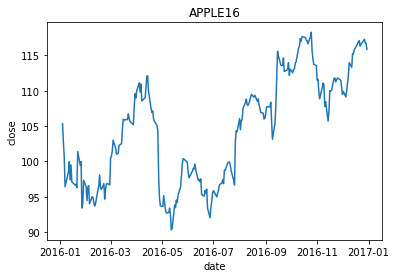

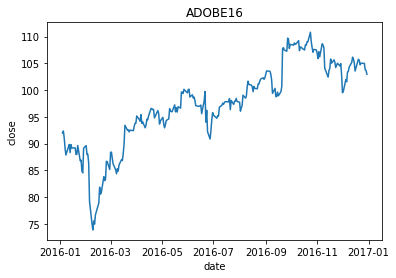

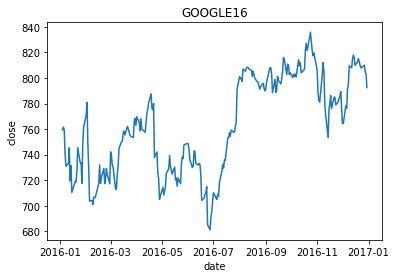

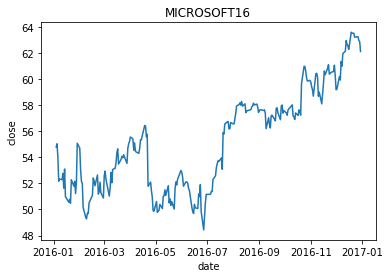

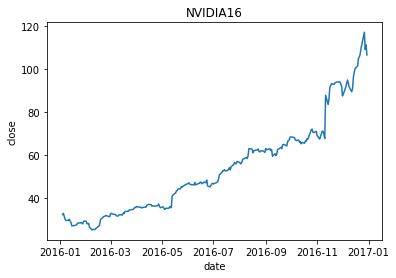

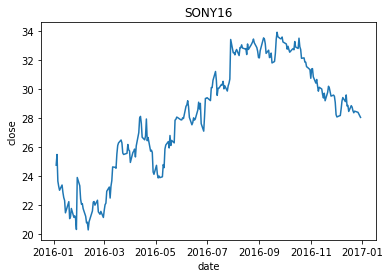

In [53]:
for name in dat16:
    draw(name, "close")